Silent substitution example
===========================

In [1]:
import sys
sys.path.insert(0, '../')
import random

from colour.plotting import plot_chromaticity_diagram_CIE1931
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from silentsub.silentsub import SilentSubstitutionSolver as SSS
from silentsub.colorfunc import LMS_to_xyY, xyY_to_LMS
from silentsub.plotting import stim_plot

sns.set_context('notebook')
sns.set_style('whitegrid')

In [2]:
spds = pd.read_csv('../data/S2_corrected_oo_spectra.csv', index_col=['led','intensity'])
spds.index.rename(['Primary', 'Setting'], inplace=True)
spds.columns = pd.Int64Index(spds.columns.astype(int))
spds.columns.name = 'Wavelength'
spds

Wavelength            380       381       382       383       384       385  \
Primary Setting                                                               
0       0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        65       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        130      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        195      0.000026  0.000017  0.000041  0.000015  0.000036  0.000039   
        260      0.000141  0.000147  0.000168  0.000170  0.000155  0.000144   
...                   ...       ...       ...       ...       ...       ...   
9       3835     0.003609  0.004056  0.003476  0.003724  0.002943  0.003147   
        3900     0.003415  0.003666  0.003451  0.003724  0.002873  0.003021   
        3965     0.003560  0.003867  0.003539  0.003874  0.003191  0.003165   
        4030     0.003738  0.003652  0.003557  0.003737  0.002973  0.003205   
        4095     0.003459  0.004063  0.003610  0.004071  0.003099  0.003373   

Wavelength            386       387       388       389  ...       771  \
Primary Setting                                          ...             
0       0        0.000000  0.000000  0.000000  0.000000  ...  0.000000   
        65       0.000000  0.000000  0.000000  0.000000  ...  0.000000   
        130      0.000000  0.000000  0.000000  0.000000  ...  0.000000   
        195      0.000022  0.000032  0.000026  0.000021  ...  0.000022   
        260      0.000154  0.000121  0.000167  0.000169  ...  0.000088   
...                   ...       ...       ...       ...  ...       ...   
9       3835     0.003482  0.002543  0.003630  0.004153  ...  0.002318   
        3900     0.003112  0.002289  0.003514  0.004000  ...  0.002279   
        3965     0.003544  0.002428  0.003695  0.004005  ...  0.002134   
        4030     0.003420  0.002227  0.003520  0.003932  ...  0.002444   
        4095     0.003231  0.002468  0.003654  0.004141  ...  0.002274   

Wavelength                772       773       774       775       776  \
Primary Setting                                                         
0       0        0.000000e+00  0.000000  0.000000  0.000000  0.000000   
        65       0.000000e+00  0.000000  0.000000  0.000000  0.000000   
        130      0.000000e+00  0.000000  0.000000  0.000000  0.000000   
        195      5.119073e-07  0.000008  0.000009  0.000000  0.000015   
        260      7.298278e-05  0.000088  0.000081  0.000071  0.000086   
...                       ...       ...       ...       ...       ...   
9       3835     2.590713e-03  0.002629  0.002536  0.002962  0.002583   
        3900     2.669694e-03  0.002370  0.002300  0.002815  0.002574   
        3965     2.682856e-03  0.002604  0.002552  0.002775  0.002638   
        4030     2.647269e-03  0.002541  0.002408  0.002702  0.002547   
        4095     2.544598e-03  0.002587  0.002493  0.002923  0.002699   

Wavelength            777       778       779       780  
Primary Setting                                          
0       0        0.000000  0.000011  0.000000  0.000000  
        65       0.000000  0.000000  0.000000  0.000000  
        130      0.000000  0.000000  0.000000  0.000000  
        195      0.000012  0.000000  0.000018  0.000000  
        260      0.000086  0.000010  0.000100  0.000078  
...                   ...       ...       ...       ...  
9       3835     0.002606  0.002213  0.002467  0.002924  
        3900     0.002412  0.002107  0.002590  0.002938  
        3965     0.002748  0.002137  0.002676  0.002664  
        4030     0.002385  0.002038  0.002477  0.002837  
        4095     0.002592  0.002177  0.002471  0.002698  

[640 rows x 401 columns]

Instantiate `SilentSubstitution` class, which inherits from `silentsub.device.StimulationDevice`
------------------------------------------------------------------------------------------------

In [4]:
# list of colors for the primaries
colors = [
    'blueviolet', 'royalblue', 
    'darkblue', 'blue', 'cyan',
    'green', 'lime', 'orange',
    'red', 'darkred'
]

sss = SSS(
    resolutions=[4095]*10,
    colors=colors,
    spds=spds,
    spd_binwidth=1,
    ignore=['R'],
    silence=['S', 'M', 'L'], # Silence melanopsin
    isolate=['I'], # Isolate LMS
    background=None,
    bounds=None,
)

Plot the gamut
--------------

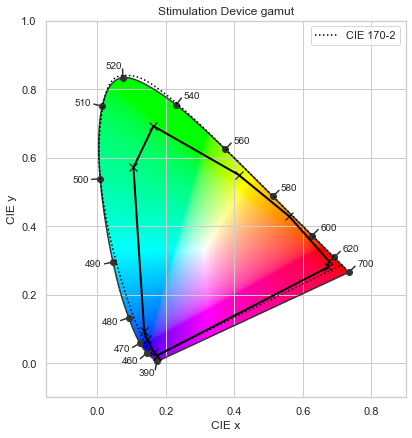

In [4]:
_ = ss.plot_gamut()

Define a background spectrum with xy chromaticity values and luminance
----------------------------------------------------------------------

Optimization terminated successfully    (Exit mode 0)
            Current function value: 5.17691650817e-12
            Iterations: 19
            Function evaluations: 226
            Gradient evaluations: 19
Requested LMS: [ 0.30189921  0.23924246  0.0681978 ]
Solution LMS: [ 0.30189938  0.23924038  0.06819689]


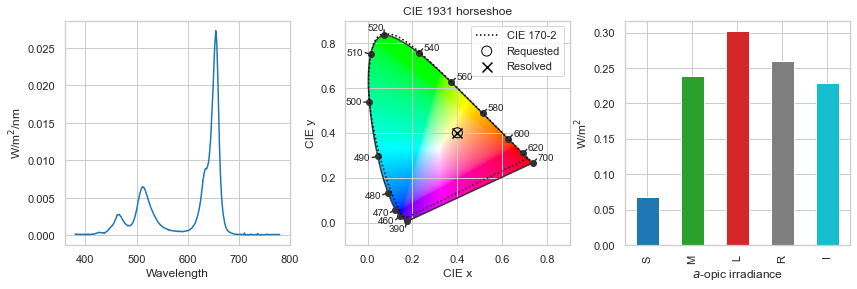

In [10]:
# Orange background of 600 lx
xy = [.4, .4]
luminance = 200.

# Find the spectrum
result = sss.find_settings_xyY(xy, luminance) 

# Get the LMS of solution and print
requested_lms = xyY_to_LMS(requested_xyY)
solution_lms = ss.predict_multiprimary_aopic(result.x)[['L','M','S']].values

# Plot
f, axs = stim_plot()

# Plot the spectrum
ss.predict_multiprimary_spd(result.x).T.plot(ax=axs[0], legend=False)

# Plot solution on horseshoe (is this even helpful?)
solution_xyY = LMS_to_xyY(solution_lms)
axs[1].scatter(x=requested_xyY[0], 
               y=requested_xyY[1],
               s=100, marker='o', 
               facecolors='none', 
               edgecolors='k', 
               label='Requested')
axs[1].scatter(x=solution_xyY[0], 
               y=solution_xyY[1],
               s=100, c='k',
               marker='x', 
               label='Resolved')
axs[1].legend()


# Plot aopic irradiances
device_ao = sss.predict_multiprimary_aopic(result.x, 'Background')
colors = [val[1] for val in ss.aopic_colors.items()]
device_ao.plot(kind='bar', color=colors, ax=axs[2]);

Now we need to do the proper optimsation
----------------------------------------

basinhopping step 0: f 34.8003


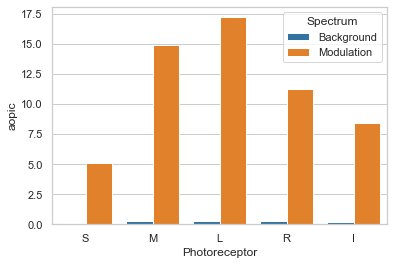

basinhopping step 1: f 24.1012 trial_f 24.1012 accepted 1  lowest_f 24.1012
found new global minimum on step 1 with function value 24.1012


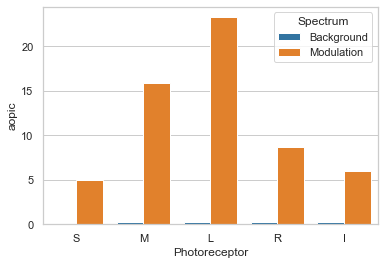

basinhopping step 2: f 16.1567 trial_f 16.1567 accepted 1  lowest_f 16.1567
found new global minimum on step 2 with function value 16.1567


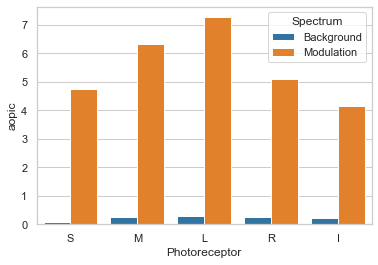

basinhopping step 3: f 0.777981 trial_f 0.777981 accepted 1  lowest_f 0.777981
found new global minimum on step 3 with function value 0.777981


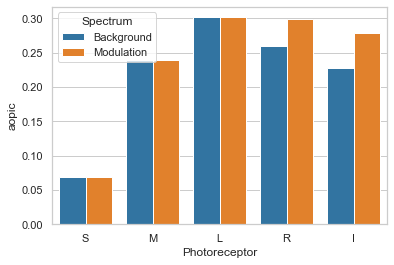

basinhopping step 4: f 0.897185 trial_f 0.897185 accepted 1  lowest_f 0.777981


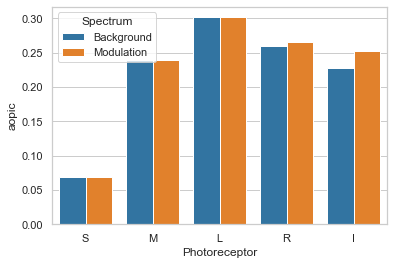

basinhopping step 5: f 0.772986 trial_f 0.772986 accepted 1  lowest_f 0.772986
found new global minimum on step 5 with function value 0.772986


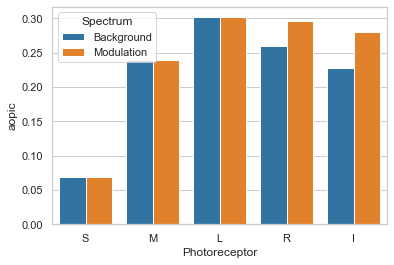

basinhopping step 6: f 1.02852 trial_f 1.02852 accepted 1  lowest_f 0.772986


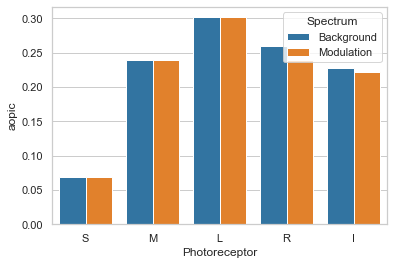

basinhopping step 7: f 0.777981 trial_f 0.777981 accepted 1  lowest_f 0.772986


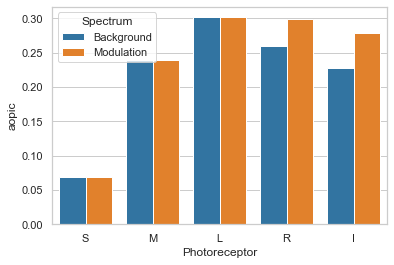

basinhopping step 8: f 0.783098 trial_f 0.783098 accepted 1  lowest_f 0.772986


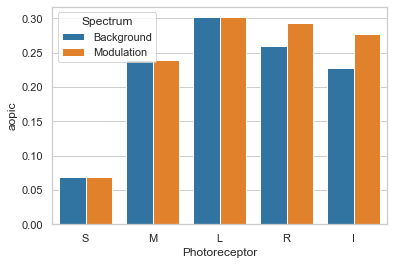

basinhopping step 9: f 0.774361 trial_f 0.774361 accepted 1  lowest_f 0.772986


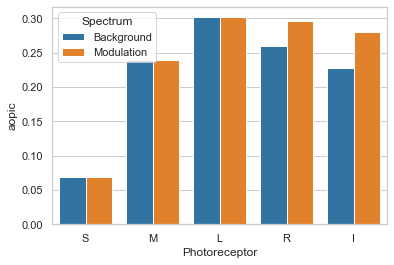

basinhopping step 10: f 0.298284 trial_f 0.298284 accepted 1  lowest_f 0.298284
found new global minimum on step 10 with function value 0.298284


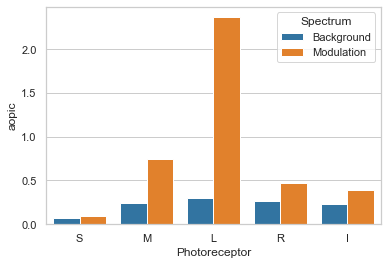

basinhopping step 11: f 0.298284 trial_f 26.0423 accepted 0  lowest_f 0.298284


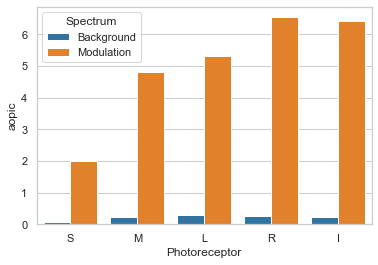

basinhopping step 12: f 0.777981 trial_f 0.777981 accepted 1  lowest_f 0.298284


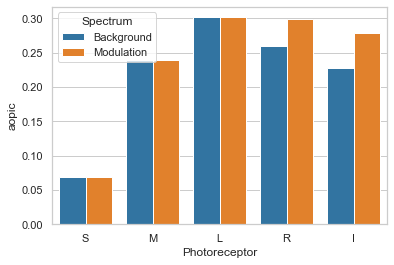

basinhopping step 13: f 0.772987 trial_f 0.772987 accepted 1  lowest_f 0.298284


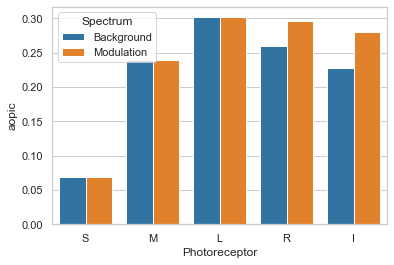

basinhopping step 14: f 0.910691 trial_f 0.910691 accepted 1  lowest_f 0.298284


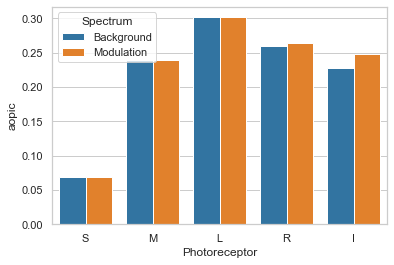

basinhopping step 15: f 0.774453 trial_f 0.774453 accepted 1  lowest_f 0.298284


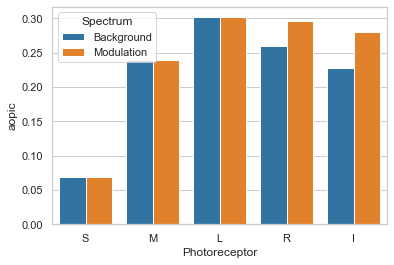

basinhopping step 16: f 0.774453 trial_f 4.33839 accepted 0  lowest_f 0.298284


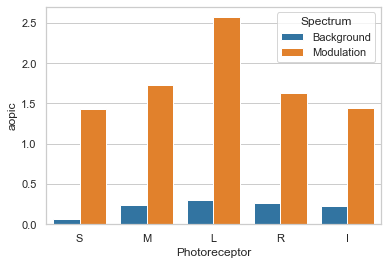

basinhopping step 17: f 0.811561 trial_f 0.811561 accepted 1  lowest_f 0.298284


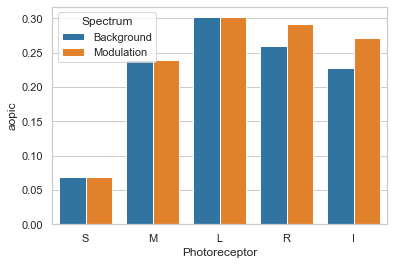

basinhopping step 18: f 0.772986 trial_f 0.772986 accepted 1  lowest_f 0.298284


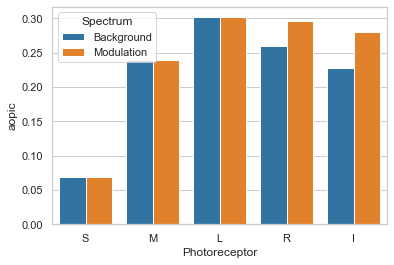

basinhopping step 19: f 0.772985 trial_f 0.772985 accepted 1  lowest_f 0.298284


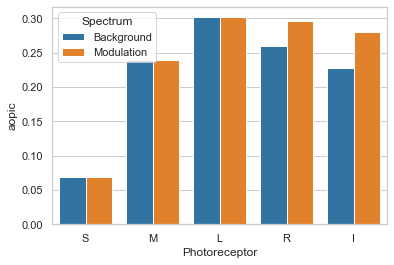

basinhopping step 20: f 0.83058 trial_f 0.83058 accepted 1  lowest_f 0.298284


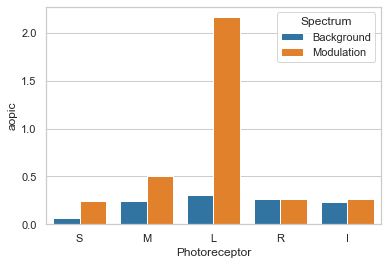

basinhopping step 21: f 0.83058 trial_f 6.53866 accepted 0  lowest_f 0.298284


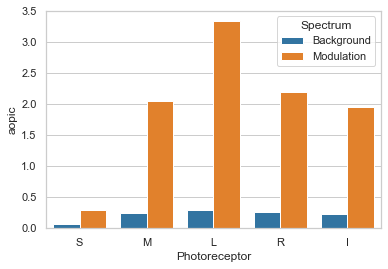

basinhopping step 22: f 0.83058 trial_f 8.06564 accepted 0  lowest_f 0.298284


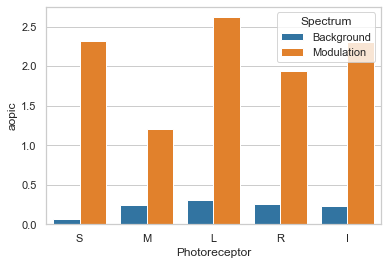

basinhopping step 23: f 0.83058 trial_f 7.28597 accepted 0  lowest_f 0.298284


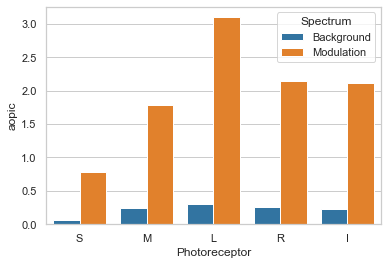

basinhopping step 24: f 0.772985 trial_f 0.772985 accepted 1  lowest_f 0.298284


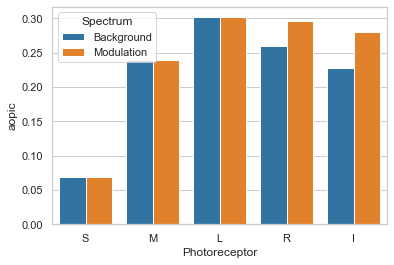

basinhopping step 25: f 0.774456 trial_f 0.774456 accepted 1  lowest_f 0.298284


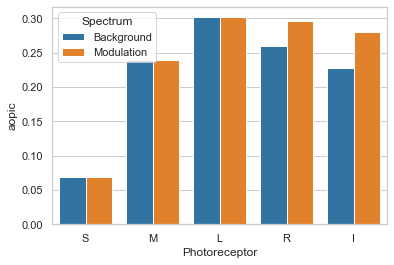

basinhopping step 26: f 0.907347 trial_f 0.907347 accepted 1  lowest_f 0.298284


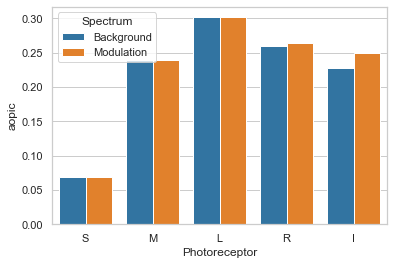

basinhopping step 27: f 0.772985 trial_f 0.772985 accepted 1  lowest_f 0.298284


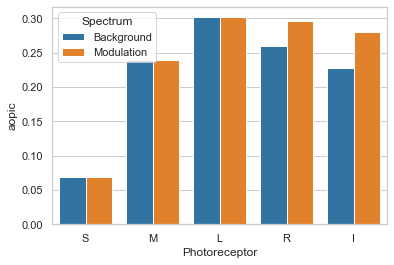

basinhopping step 28: f 0.77798 trial_f 0.77798 accepted 1  lowest_f 0.298284


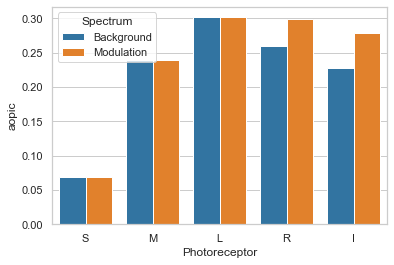

basinhopping step 29: f 0.772985 trial_f 0.772985 accepted 1  lowest_f 0.298284


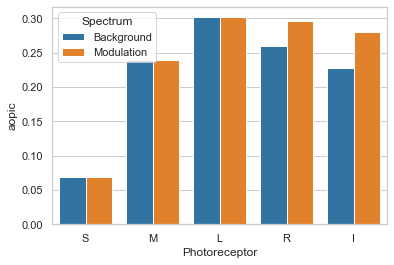

basinhopping step 30: f 0.777981 trial_f 0.777981 accepted 1  lowest_f 0.298284


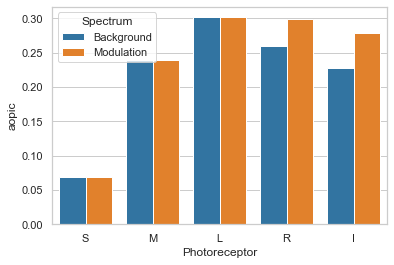

basinhopping step 31: f 0.773996 trial_f 0.773996 accepted 1  lowest_f 0.298284


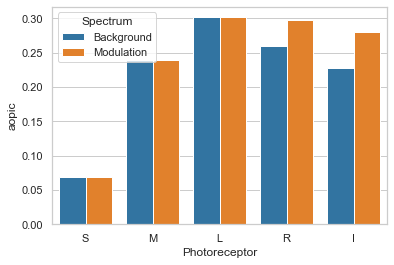

basinhopping step 32: f 0.773996 trial_f 0.773996 accepted 1  lowest_f 0.298284


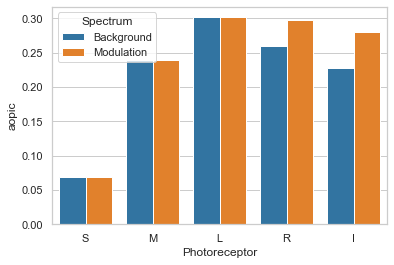

basinhopping step 33: f 0.774455 trial_f 0.774455 accepted 1  lowest_f 0.298284


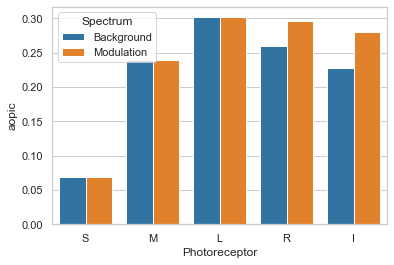

basinhopping step 34: f 0.772987 trial_f 0.772987 accepted 1  lowest_f 0.298284


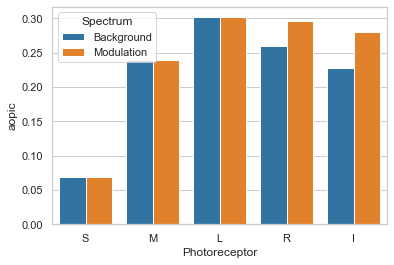

basinhopping step 35: f 0.528178 trial_f 0.528178 accepted 1  lowest_f 0.298284


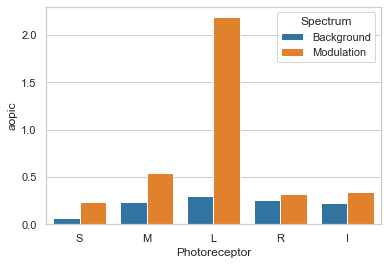

basinhopping step 36: f 0.528178 trial_f 4.14188 accepted 0  lowest_f 0.298284


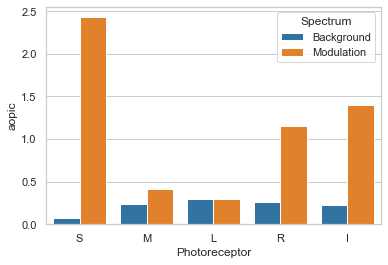

basinhopping step 37: f 0.774164 trial_f 0.774164 accepted 1  lowest_f 0.298284


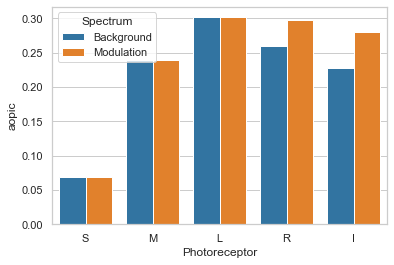

basinhopping step 38: f 0.778315 trial_f 0.778315 accepted 1  lowest_f 0.298284


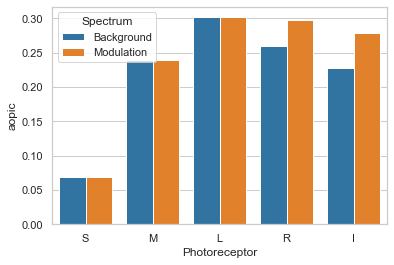

basinhopping step 39: f 0.778315 trial_f 1.41342 accepted 0  lowest_f 0.298284


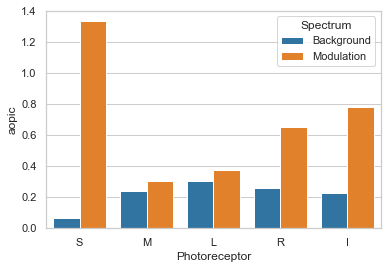

basinhopping step 40: f 0.773996 trial_f 0.773996 accepted 1  lowest_f 0.298284


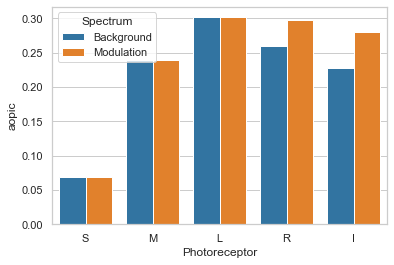

basinhopping step 41: f 0.819747 trial_f 0.819747 accepted 1  lowest_f 0.298284


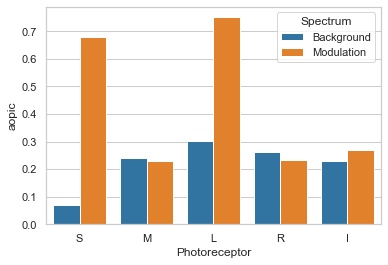

basinhopping step 42: f 0.777981 trial_f 0.777981 accepted 1  lowest_f 0.298284


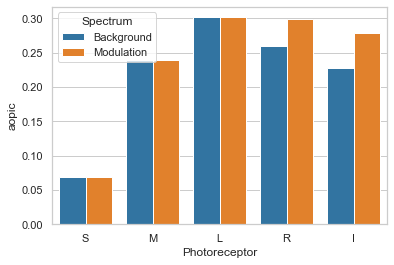

basinhopping step 43: f 0.777981 trial_f 0.777981 accepted 1  lowest_f 0.298284


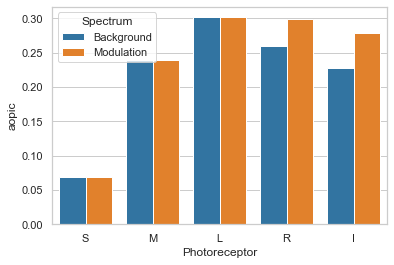

basinhopping step 44: f 0.929413 trial_f 0.929413 accepted 1  lowest_f 0.298284


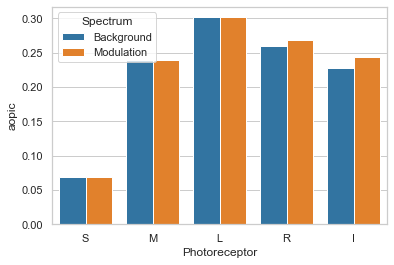

basinhopping step 45: f 0.774454 trial_f 0.774454 accepted 1  lowest_f 0.298284


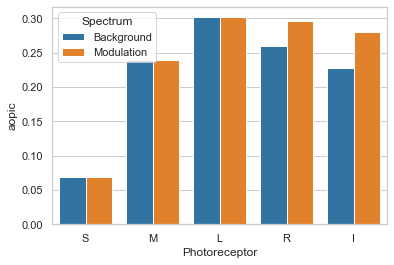

basinhopping step 46: f 0.777981 trial_f 0.777981 accepted 1  lowest_f 0.298284


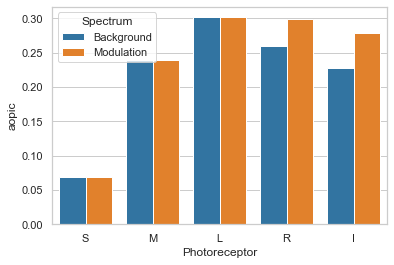

basinhopping step 47: f 0.776761 trial_f 0.776761 accepted 1  lowest_f 0.298284


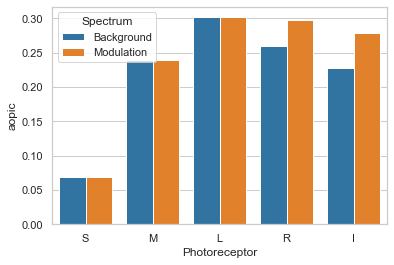

basinhopping step 48: f 0.777981 trial_f 0.777981 accepted 1  lowest_f 0.298284


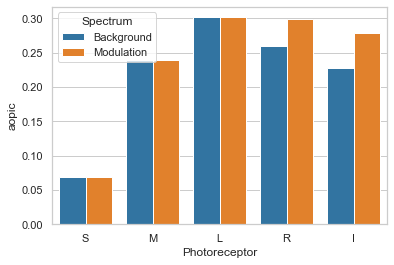

basinhopping step 49: f 0.777981 trial_f 8.92796 accepted 0  lowest_f 0.298284


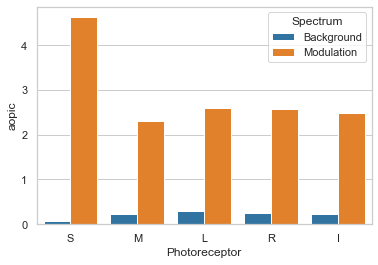

adaptive stepsize: acceptance rate 0.820000 target 0.500000 new stepsize 0.555556 old stepsize 0.5
basinhopping step 50: f 0.777981 trial_f 8.30219 accepted 0  lowest_f 0.298284


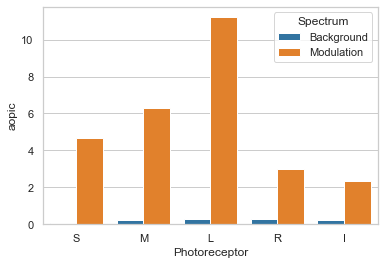

basinhopping step 51: f 0.777981 trial_f 6.62312 accepted 0  lowest_f 0.298284


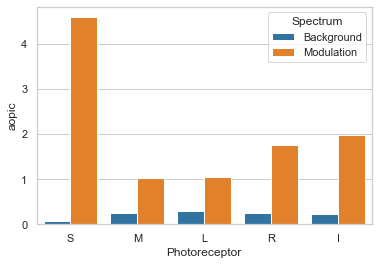

basinhopping step 52: f 0.773786 trial_f 0.773786 accepted 1  lowest_f 0.298284


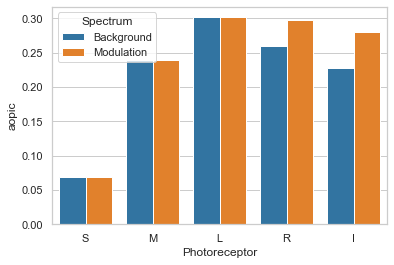

basinhopping step 53: f 0.773786 trial_f 1.22895 accepted 0  lowest_f 0.298284


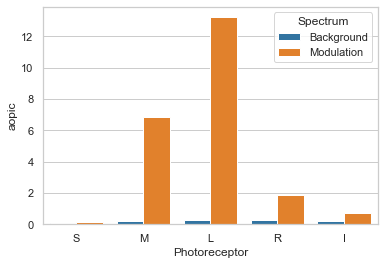

basinhopping step 54: f 0.78289 trial_f 0.78289 accepted 1  lowest_f 0.298284


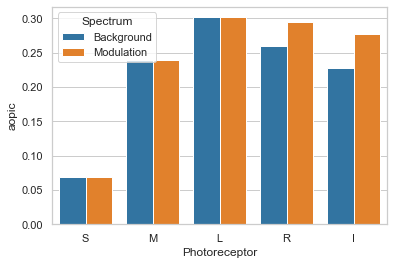

basinhopping step 55: f 0.777981 trial_f 0.777981 accepted 1  lowest_f 0.298284


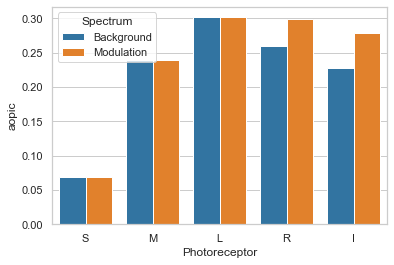

basinhopping step 56: f 0.910535 trial_f 0.910535 accepted 1  lowest_f 0.298284


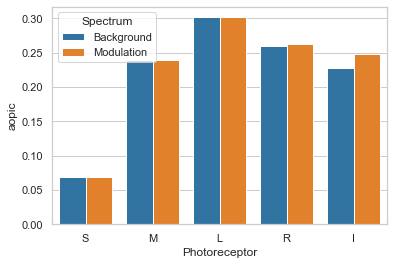

basinhopping step 57: f 0.774453 trial_f 0.774453 accepted 1  lowest_f 0.298284


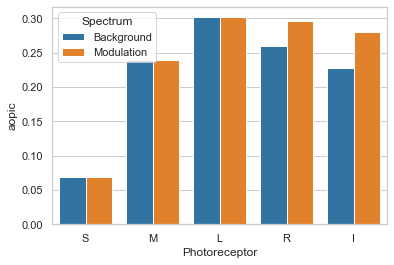

basinhopping step 58: f 0.772987 trial_f 0.772987 accepted 1  lowest_f 0.298284


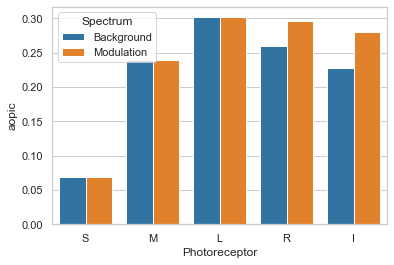

basinhopping step 59: f 0.777981 trial_f 0.777981 accepted 1  lowest_f 0.298284


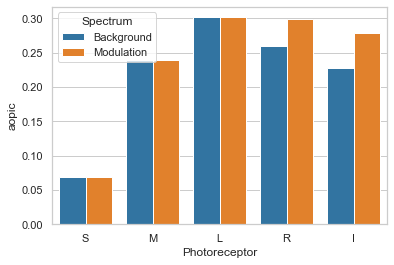

basinhopping step 60: f 0.772985 trial_f 0.772985 accepted 1  lowest_f 0.298284


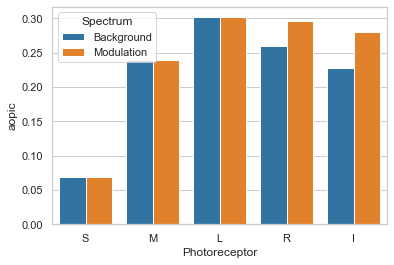

basinhopping step 61: f 0.773996 trial_f 0.773996 accepted 1  lowest_f 0.298284


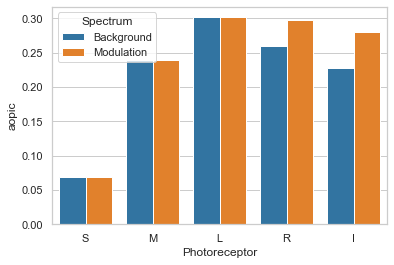

basinhopping step 62: f 0.772985 trial_f 0.772985 accepted 1  lowest_f 0.298284


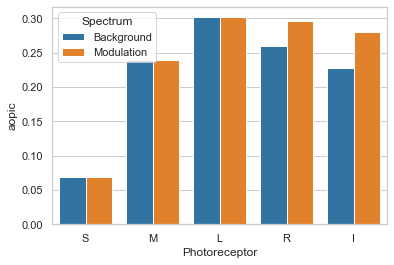

basinhopping step 63: f 0.790885 trial_f 0.790885 accepted 1  lowest_f 0.298284


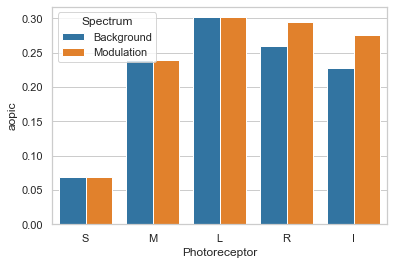

basinhopping step 64: f 0.604301 trial_f 0.604301 accepted 1  lowest_f 0.298284


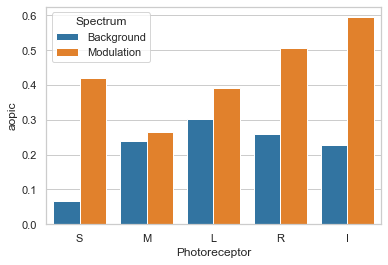

basinhopping step 65: f 0.772985 trial_f 0.772985 accepted 1  lowest_f 0.298284


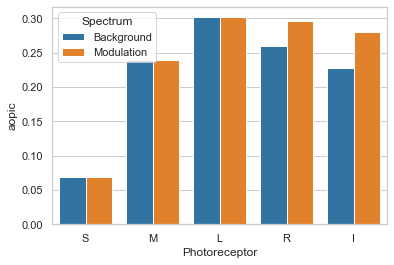

basinhopping step 66: f 0.910733 trial_f 0.910733 accepted 1  lowest_f 0.298284


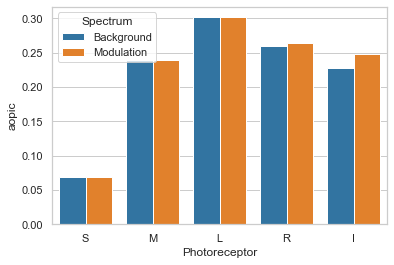

basinhopping step 67: f 0.777981 trial_f 0.777981 accepted 1  lowest_f 0.298284


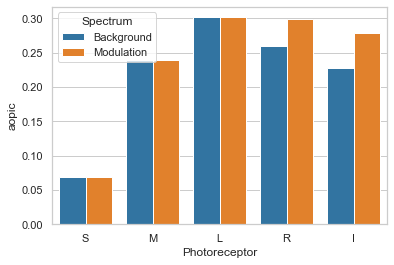

basinhopping step 68: f 1.02763 trial_f 1.02763 accepted 1  lowest_f 0.298284


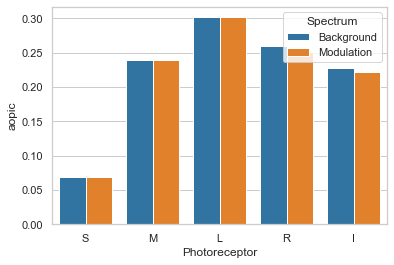

basinhopping step 69: f 0.776762 trial_f 0.776762 accepted 1  lowest_f 0.298284


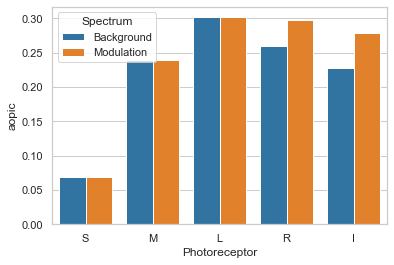

basinhopping step 70: f 0.785324 trial_f 0.785324 accepted 1  lowest_f 0.298284


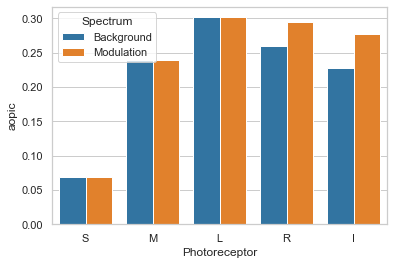

basinhopping step 71: f 0.774318 trial_f 0.774318 accepted 1  lowest_f 0.298284


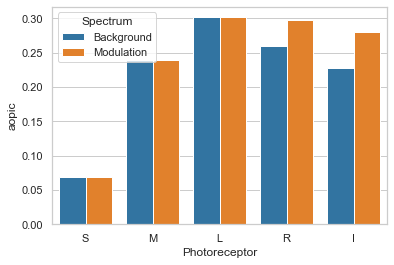

basinhopping step 72: f 0.878573 trial_f 0.878573 accepted 1  lowest_f 0.298284


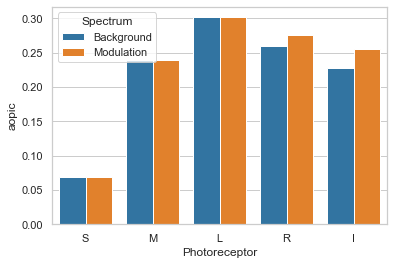

basinhopping step 73: f 1.82006 trial_f 1.82006 accepted 1  lowest_f 0.298284


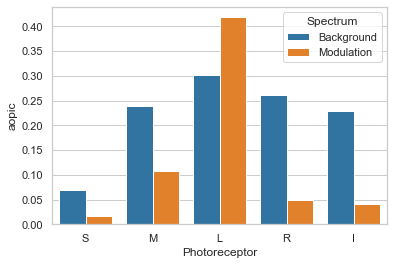

basinhopping step 74: f 0.772985 trial_f 0.772985 accepted 1  lowest_f 0.298284


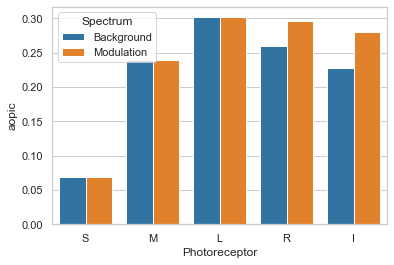

basinhopping step 75: f 0.773996 trial_f 0.773996 accepted 1  lowest_f 0.298284


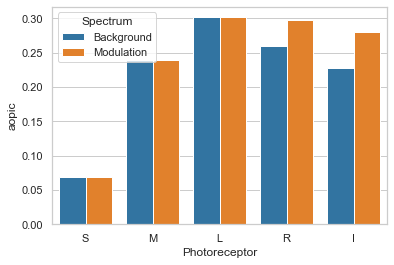

basinhopping step 76: f 1.00462 trial_f 1.00462 accepted 1  lowest_f 0.298284


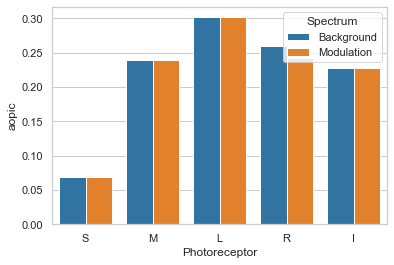

basinhopping step 77: f 0.774454 trial_f 0.774454 accepted 1  lowest_f 0.298284


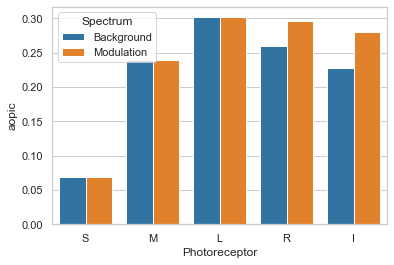

basinhopping step 78: f 0.774454 trial_f 9.79177 accepted 0  lowest_f 0.298284


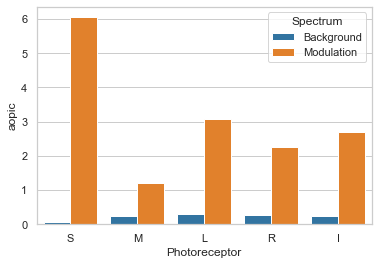

basinhopping step 79: f 0.787072 trial_f 0.787072 accepted 1  lowest_f 0.298284


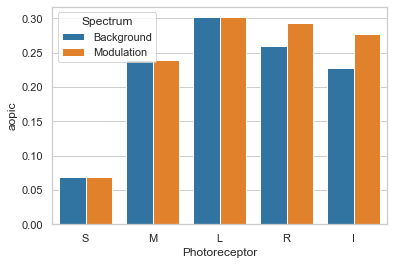

basinhopping step 80: f 0.772986 trial_f 0.772986 accepted 1  lowest_f 0.298284


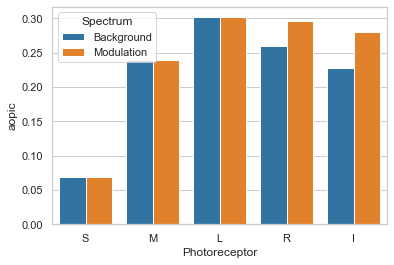

basinhopping step 81: f 0.774816 trial_f 0.774816 accepted 1  lowest_f 0.298284


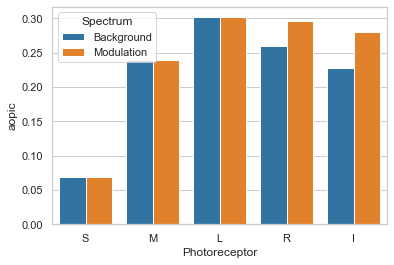

basinhopping step 82: f 0.773045 trial_f 0.773045 accepted 1  lowest_f 0.298284


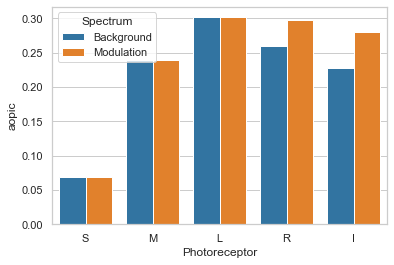

basinhopping step 83: f 0.55159 trial_f 0.55159 accepted 1  lowest_f 0.298284


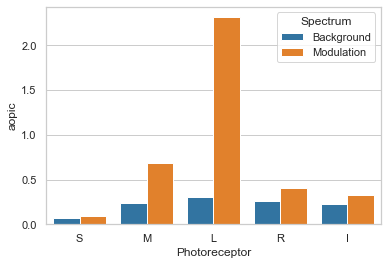

basinhopping step 84: f 0.55159 trial_f 11.9675 accepted 0  lowest_f 0.298284


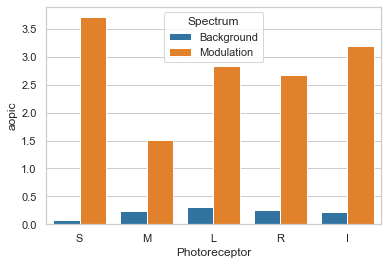

basinhopping step 85: f 0.55159 trial_f 30.4199 accepted 0  lowest_f 0.298284


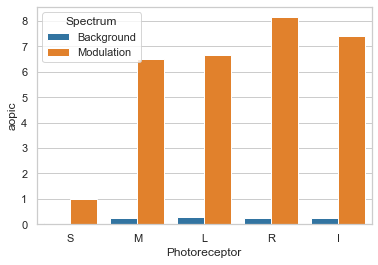

basinhopping step 86: f 0.773996 trial_f 0.773996 accepted 1  lowest_f 0.298284


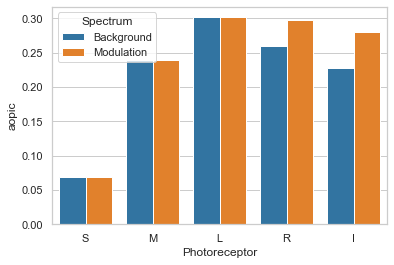

basinhopping step 87: f 0.801239 trial_f 0.801239 accepted 1  lowest_f 0.298284


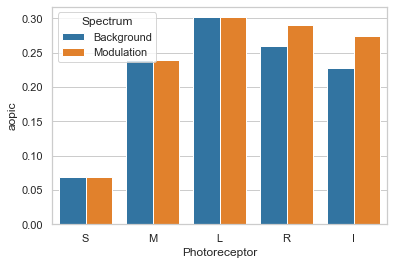

basinhopping step 88: f 0.774456 trial_f 0.774456 accepted 1  lowest_f 0.298284


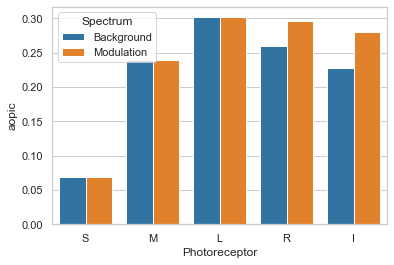

basinhopping step 89: f 0.774456 trial_f 13.9026 accepted 0  lowest_f 0.298284


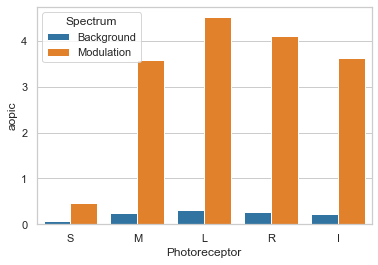

basinhopping step 90: f 0.772985 trial_f 0.772985 accepted 1  lowest_f 0.298284


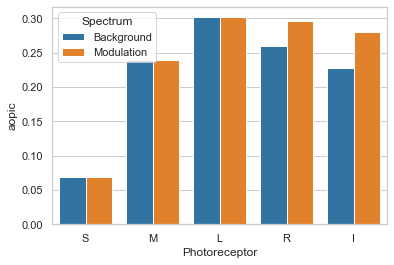

basinhopping step 91: f 0.774452 trial_f 0.774452 accepted 1  lowest_f 0.298284


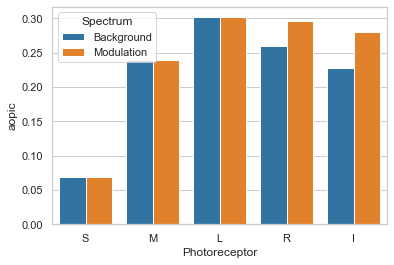

basinhopping step 92: f 0.624315 trial_f 0.624315 accepted 1  lowest_f 0.298284


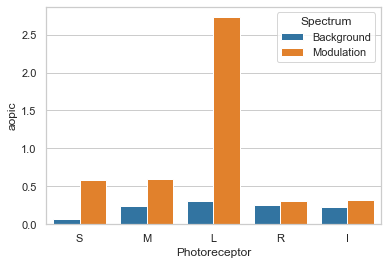

basinhopping step 93: f 0.624315 trial_f 5.1009 accepted 0  lowest_f 0.298284


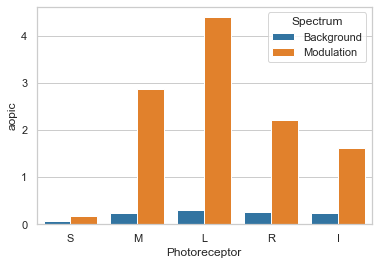

In [ ]:
ss.set_background(result.x)
res = ss.find_modulation_spectra(target_contrast=1., tollerance=.1)

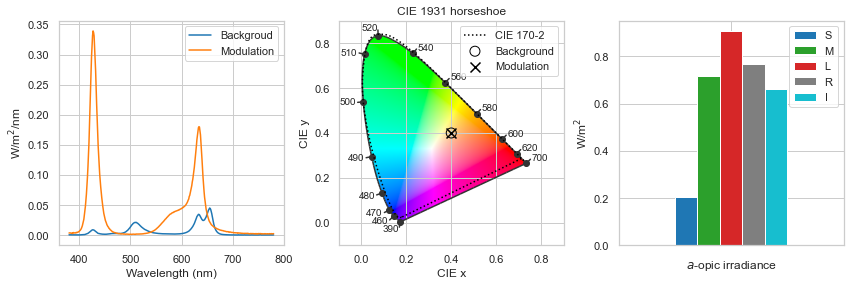

In [43]:
# Plot
f, axs = stim_plot()

# Plot the spectrum
axs[0].plot(ss.predict_multiprimary_spd(ss.background).T, label='Backgroud')
axs[0].plot(ss.predict_multiprimary_spd(res.x).T, label='Modulation')
axs[0].legend()

# Plot solution on horseshoe
solution_xyY = LMS_to_xyY(solution_lms)
axs[1].scatter(x=requested_xyY[0], 
               y=requested_xyY[1],
               s=100, marker='o', 
               facecolors='none', 
               edgecolors='k', 
               label='Background')
axs[1].scatter(x=solution_xyY[0], 
               y=solution_xyY[1],
               s=100, c='k',
               marker='x', 
               label='Modulation')
axs[1].legend()

# Plot aopic irradiances
bg_ao = ss.predict_multiprimary_aopic(ss.background)
mod_ao = ss.predict_multiprimary_aopic(res.x)
device_ao.plot(kind='bar', color=ss.aopic_colors, ax=axs[2]);
axs[2].set(
    xticklabels='',
    ylabel='W/m$^2$',
    xlabel='$a$-opic irradiance'
);

In [44]:
bg_ao = ss.predict_multiprimary_aopic(ss.background)
mod_ao = ss.predict_multiprimary_aopic(res.x)
bg_ao.index=['Background']
mod_ao.index=['Modulation']
ao = bg_ao.append(mod_ao).reset_index().melt(id_vars='index', 
                                             var_name='Photoreceptor', 
                                             value_name='W/m$^2$')
ao

,index,Photoreceptor,W/m$^2$
0,Background,S,0.204595
1,Modulation,S,4.646401
2,Background,M,0.717729
3,Modulation,M,1.864222
4,Background,L,0.905701
5,Modulation,L,3.751908
6,Background,R,0.766122
7,Modulation,R,1.779218
8,Background,I,0.662733
9,Modulation,I,1.915838


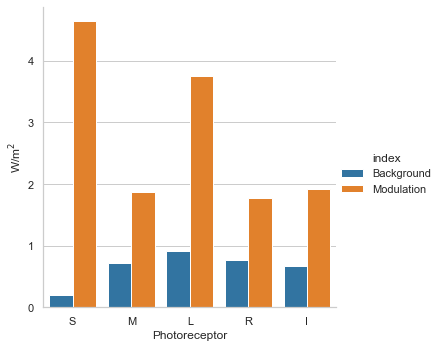

In [45]:
sns.factorplot(data=ao, x='Photoreceptor', y='W/m$^2$', kind='bar', hue='index')

In [46]:
ss.background

array([ 0.02687369,  0.00109135,  0.00826551,  0.00493672,  0.06431814,
        0.0040263 ,  0.02332968,  0.00220418,  0.0536408 ,  0.07080747])

In [47]:
ss.modulation

array([  1.00000000e+00,   6.03218302e-13,   7.68116791e-15,
         7.85408580e-13,   2.14124962e-15,   3.85490961e-03,
         5.42667396e-10,   1.69776317e-01,   5.07936503e-01,
         5.79264350e-09])

In [48]:
result.x

array([ 0.02687369,  0.00109135,  0.00826551,  0.00493672,  0.06431814,
        0.0040263 ,  0.02332968,  0.00220418,  0.0536408 ,  0.07080747])